In [92]:
# imports
import numpy as np
import pandas as pd
import glob
import mediapipe as mp # for hand detection
import cv2 # for capturing videos
import pickle # to save the model
import argparse
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as pl
from PIL import Image
from tqdm import tqdm

In [93]:
# load the hands coordinates from the 300_300_AfC dataset
file_name = os.path.join(".", "pickle_data", "300_300_AfC_hands_coordinates.pickle")
with open(file_name, "rb") as f:
    hands_300_300_AfC = pickle.load(f)

In [94]:
frames_with_hands_AfC = 0
frames_with_both_hands_AfC = 0

for hand in hands_300_300_AfC:
    if hand[1] != None or hand[2] != None:
        frames_with_hands_AfC += 1
    if hand[1] != None and hand[2] != None:
        frames_with_both_hands_AfC += 1

print("Results for the 300_300_AfC dataset : ")
print("Percentage of frames with at least one hand detected : ", frames_with_hands_AfC/len(hands_300_300_AfC)*100, "%")
print("Percentage of frames with both hands detected : ", frames_with_both_hands_AfC/len(hands_300_300_AfC)*100, "%")

Results for the 300_300_AfC dataset : 
Percentage of frames with at least one hand detected :  70.64108790675085 %
Percentage of frames with both hands detected :  21.834455005897453 %


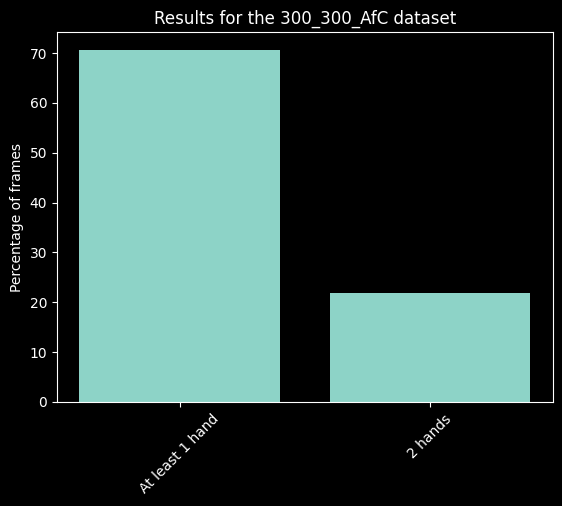

In [95]:
x = ["At least 1 hand", "2 hands"]
y = [frames_with_hands_AfC/len(hands_300_300_AfC)*100, frames_with_both_hands_AfC/len(hands_300_300_AfC)*100]
pl.bar(x, y)
pl.xticks(rotation=45)
pl.ylabel("Percentage of frames")
pl.title("Results for the 300_300_AfC dataset")
pl.show()


In [96]:
# load the hands coordinates from the 300_300_AfP dataset
file_name = os.path.join(".", "pickle_data", "300_300_AfP_hands_coordinates.pickle")
with open(file_name, "rb") as f:
    hands_300_300_AfP = pickle.load(f)

In [97]:
frames_with_hands_AfP = 0
frames_with_both_hands_AfP = 0

for hand in hands_300_300_AfP:
    if hand[1] != None or hand[2] != None:
        frames_with_hands_AfP += 1
    if hand[1] != None and hand[2] != None:
        frames_with_both_hands_AfP += 1

print("Results for the 300_300_AfP dataset : ")
print("Percentage of frames with at least one hand detected : ", frames_with_hands_AfP/len(hands_300_300_AfP)*100, "%")
print("Percentage of frames with both hands detected : ", frames_with_both_hands_AfP/len(hands_300_300_AfP)*100, "%")

Results for the 300_300_AfP dataset : 
Percentage of frames with at least one hand detected :  42.562270172760705 %
Percentage of frames with both hands detected :  8.707416915284814 %


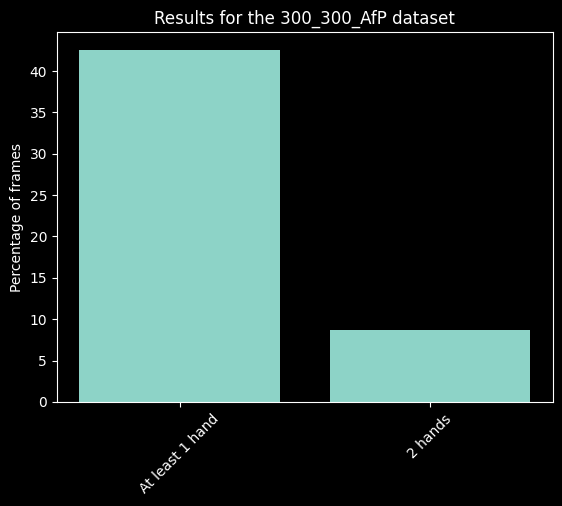

In [98]:
x = ["At least 1 hand", "2 hands"]
y = [frames_with_hands_AfP/len(hands_300_300_AfP)*100, frames_with_both_hands_AfP/len(hands_300_300_AfP)*100]
pl.bar(x, y)
pl.xticks(rotation=45)
pl.ylabel("Percentage of frames")
pl.title("Results for the 300_300_AfP dataset")
pl.show()

In [99]:
# merge results of hand detection and tracking of all frames sizes

# check for each frame if there is a hand detected with the 300_300_AfC model or the 300_300_AfP model and replace None values with the coordinates of the hand detected
hands_300_300_AfC_AfP = []

# ensure that the coordinates lists have the same length
if len(hands_300_300_AfC) != len(hands_300_300_AfP):
    print("Error : the coordinates lists have different lengths")
    exit()
else:
    print("The coordinates lists have the same length, merging can start")

    # first try to fill the list with the coordinates of the hand detected with the 300_300_AfC model
    for i in range(len(hands_300_300_AfC)):

        if hands_300_300_AfC[i][1] is not None and hands_300_300_AfC[i][2] is not None:
            hands_300_300_AfC_AfP.append([hands_300_300_AfC[i][0], hands_300_300_AfC[i][1], hands_300_300_AfC[i][2]])

        elif hands_300_300_AfC[i][1] is not None and hands_300_300_AfC[i][2] is None:
            hands_300_300_AfC_AfP.append([hands_300_300_AfC[i][0], hands_300_300_AfC[i][1], None])

        elif hands_300_300_AfC[i][1] is None and hands_300_300_AfC[i][2] is not None:
            hands_300_300_AfC_AfP.append([hands_300_300_AfC[i][0], None, hands_300_300_AfC[i][2]])
        
        else:
            hands_300_300_AfC_AfP.append([hands_300_300_AfC[i][0], None, None])

    # then try to fill the gaps with the coordinates of the hand detected with the 300_300_AfP model
    for i in range(len(hands_300_300_AfP)):

        if hands_300_300_AfC_AfP[i][1] is None and hands_300_300_AfP[i][1] is not None:
            hands_300_300_AfC_AfP[i][1] = hands_300_300_AfP[i][1]
        
        if hands_300_300_AfC_AfP[i][2] is None and hands_300_300_AfP[i][2] is not None:
            hands_300_300_AfC_AfP[i][2] = hands_300_300_AfP[i][2]



The coordinates lists have the same length, merging can start


In [100]:
print(len(hands_300_300_AfC_AfP))
print(hands_300_300_AfC_AfP)

28826
[[0, [195.09132027626038, 199.27747249603271], None], [1, [208.6511743068695, 179.4220232963562], None], [2, [90.08440017700195, 129.03473675251007], None], [3, [168.38631391525269, 161.72376036643982], [217.94182062149048, 175.3351378440857]], [4, [242.26854801177979, 193.36541175842285], None], [5, None, None], [6, [245.9678828716278, 186.20791912078857], None], [7, [265.8622133731842, 165.8008074760437], None], [8, None, None], [9, [229.717937707901, 142.1763253211975], [175.80739617347717, 190.54071307182312]], [10, [218.77127408981323, 132.37219512462616], [175.55123090744019, 139.99146223068237]], [11, [254.5061445236206, 225.83849430084229], None], [12, None, None], [13, [257.2836112976074, 187.0862066745758], [191.16891503334045, 174.26143169403076]], [14, [162.50333547592163, 184.4511902332306], None], [15, [253.95953178405762, 188.61847043037415], [188.4305226802826, 167.34599947929382]], [16, [172.6918351650238, 194.08300280570984], None], [17, None, None], [18, None, 

In [101]:
frames_with_hands = 0
frames_with_both_hands = 0

for hand in hands_300_300_AfC_AfP:
    if hand[1] != None or hand[2] != None:
        frames_with_hands += 1
    if hand[1] != None and hand[2] != None:
        frames_with_both_hands += 1

print("Percentage of frames with at least one hand detected : ", frames_with_hands/len(hands_300_300_AfC_AfP)*100, "%")
print("Percentage of frames with both hands detected : ", frames_with_both_hands/len(hands_300_300_AfC_AfP)*100, "%")

Percentage of frames with at least one hand detected :  76.70852702421425 %
Percentage of frames with both hands detected :  25.678207174078953 %


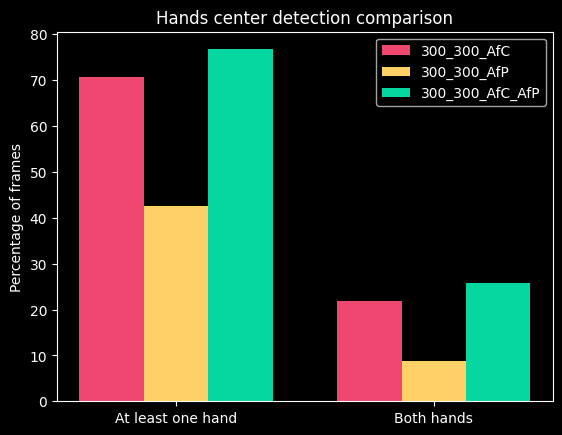

In [108]:
# plot 3 bars charts to compare the results of the 3 datasets

x = ["At least one hand", "Both hands"]
y_300_300_AfC = [frames_with_hands_AfC/len(hands_300_300_AfC)*100, frames_with_both_hands_AfC/len(hands_300_300_AfC)*100]
y_300_300_AfP = [frames_with_hands_AfP/len(hands_300_300_AfP)*100, frames_with_both_hands_AfP/len(hands_300_300_AfP)*100]
y_300_300_AfC_AfP = [frames_with_hands/len(hands_300_300_AfC_AfP)*100, frames_with_both_hands/len(hands_300_300_AfC_AfP)*100]

x_positions = np.arange(len(x))
width = 0.25

pl.bar(x_positions - width, y_300_300_AfC, color="#ef476f", width=width)
pl.bar(x_positions, y_300_300_AfP, color="#ffd166", width=width)
pl.bar(x_positions + width, y_300_300_AfC_AfP, color="#06d6a0", width=width)

pl.xticks(x_positions, x)
pl.ylabel("Percentage of frames")
pl.title("Hands center detection comparison")
pl.legend(["300_300_AfC", "300_300_AfP", "300_300_AfC_AfP"])
pl.show()

In [103]:
# save the total hands coordinates to a pickle file in the pickle_files folder
file_name = os.path.join(".", "pickle_data", "300_300_AfC_AfP_hands_coordinates_center.pickle")
with open(file_name, "wb") as f:
    pickle.dump(hands_300_300_AfC_AfP, f)

In [104]:
# load the hands coordinates from the 300_300_AfC_AfP dataset
file_name = os.path.join(".", "pickle_data", "300_300_AfC_AfP_hands_coordinates_center.pickle")
with open(file_name, "rb") as f:
    hands_300_300_AfC_AfP = pickle.load(f)

hands_300_300_AfC_AfP

[[0, [195.09132027626038, 199.27747249603271], None],
 [1, [208.6511743068695, 179.4220232963562], None],
 [2, [90.08440017700195, 129.03473675251007], None],
 [3,
  [168.38631391525269, 161.72376036643982],
  [217.94182062149048, 175.3351378440857]],
 [4, [242.26854801177979, 193.36541175842285], None],
 [5, None, None],
 [6, [245.9678828716278, 186.20791912078857], None],
 [7, [265.8622133731842, 165.8008074760437], None],
 [8, None, None],
 [9,
  [229.717937707901, 142.1763253211975],
  [175.80739617347717, 190.54071307182312]],
 [10,
  [218.77127408981323, 132.37219512462616],
  [175.55123090744019, 139.99146223068237]],
 [11, [254.5061445236206, 225.83849430084229], None],
 [12, None, None],
 [13,
  [257.2836112976074, 187.0862066745758],
  [191.16891503334045, 174.26143169403076]],
 [14, [162.50333547592163, 184.4511902332306], None],
 [15,
  [253.95953178405762, 188.61847043037415],
  [188.4305226802826, 167.34599947929382]],
 [16, [172.6918351650238, 194.08300280570984], None],